/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


       3GPP\n Auth\n[s]  S1AP\n Auth\n[s]  S1AP\n Security\n[s]  \
count        100.000000        100.000000            100.000000   
mean           0.002562          0.000296              0.001094   
std            0.001235          0.000176              0.000663   
min            0.000839          0.000124              0.000482   
25%            0.001247          0.000153              0.000604   
50%            0.002546          0.000207              0.000735   
75%            0.003754          0.000472              0.001699   
max            0.004675          0.001142              0.002453   

       Location\nUpdate\n[s]    ESM\n[s]  Context Setup\n[s]  
count             100.000000  100.000000           79.000000  
mean                0.003382    0.000964            0.000164  
std                 0.002151    0.000690            0.000039  
min                 0.001441    0.000537            0.000113  
25%                 0.001933    0.000615            0.000135  
50%               

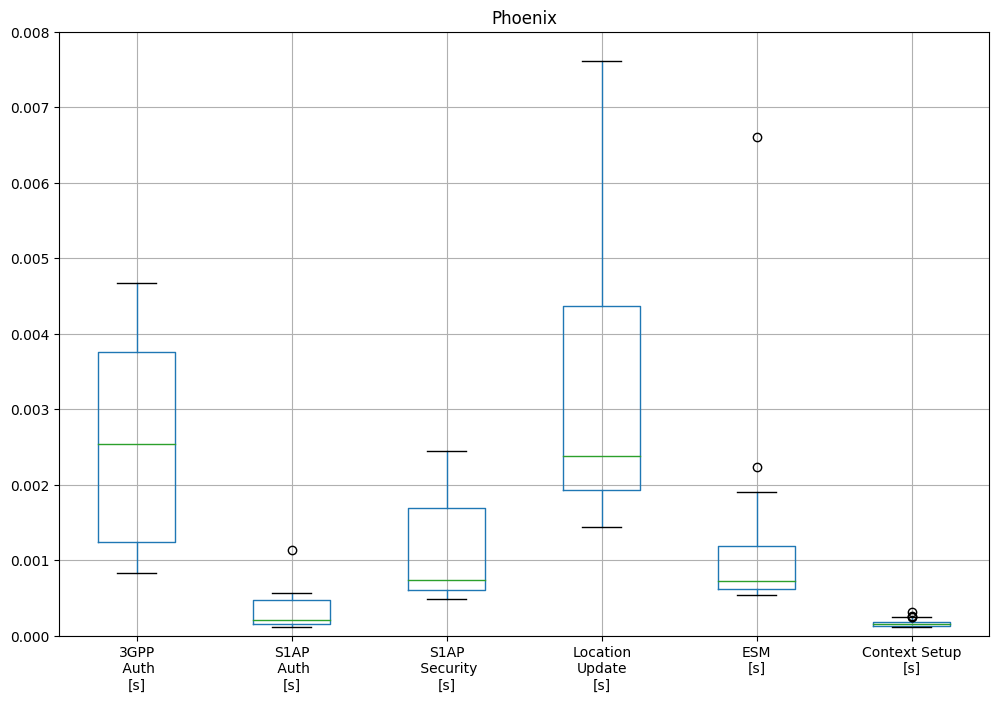

In [1]:
import pandas
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8), dpi=100)
box = pandas.read_csv('attachment.csv', usecols=['Time','Source','Destination','Info'])
# print(box.head())
#radio layer
s1ap_req = box[box['Info'].str.contains("Attach request")]
#EPC
auth_req = box[box['Info'].str.contains("3GPP-Authentication-Information Request")]
auth_ans = box[box['Info'].str.contains("3GPP-Authentication-Information Answer")]
s1ap_auth_req = box[box['Info'].str.contains("Authentication request")]
s1ap_auth_ans = box[box['Info'].str.contains("Authentication response")]
s1ap_sec_req = box[box['Info'].str.contains("Security mode command")]
s1ap_sec_ans = box[box['Info'].str.contains("Security mode complete")]
loc_req = box[box['Info'].str.contains("3GPP-Update-Location Request")]
loc_ans = box[box['Info'].str.contains("3GPP-Update-Location Answer")]
esm_req = box[box['Info'].str.contains("ESM information request")]
esm_ans = box[box['Info'].str.contains("ESM information response")]
ctx_req = box[box['Info'].str.contains("InitialContextSetupRequest")]
ctx_ans = box[box['Info'].str.contains("InitialContextSetupResponse")]
#radio layer
s1ap_ans = box[box['Info'].str.contains("Attach complete")]
s1ap_req.drop(s1ap_req.tail(21).index,inplace=True) #fix for rejected ones

rtt_auth = auth_ans['Time'].values -auth_req['Time'].values
rtt_s1ap_auth = s1ap_auth_ans['Time'].values -s1ap_auth_req['Time'].values
rtt_s1ap_sec = s1ap_sec_ans['Time'].values -s1ap_sec_req['Time'].values
rtt_loc = loc_ans['Time'].values -loc_req['Time'].values
rtt_esm = esm_ans['Time'].values -esm_req['Time'].values
rtt_ctx = ctx_ans['Time'].values -ctx_req['Time'].values
rtt_s1ap = s1ap_ans['Time'].values -s1ap_req['Time'].values
# print(rtt_auth)
auth= pandas.DataFrame(rtt_auth,columns=["3GPP\n Auth\n[s]"])
s1ap_auth= pandas.DataFrame(rtt_s1ap_auth,columns=["S1AP\n Auth\n[s]"])
s1ap_sec= pandas.DataFrame(rtt_s1ap_sec,columns=["S1AP\n Security\n[s]"])
loc= pandas.DataFrame(rtt_loc,columns=["Location\nUpdate\n[s]"])
esm = pandas.DataFrame(rtt_esm,columns=["ESM\n[s]"])
ctx = pandas.DataFrame(rtt_ctx,columns=["Context Setup\n[s]"])
s1ap = pandas.DataFrame(rtt_s1ap,columns=["Attachment\n[s]"])

r = pandas.concat([auth,s1ap_auth,s1ap_sec,loc,esm,ctx],axis=1)
# print(r.head())
r.boxplot()
# plt.xticks([1,2,3,4], ['CoAP Create [s]','CoAP Read [s]','CoAP Reg [s]','SCIM Imsi [s]'])
plt.title('Phoenix')
# plt.suptitle("IP CAN Session Establishment")
axes = plt.gca()
axes.set_ylim([0,0.008])
stats = r.describe()
print(stats)
plt.show()

fig.savefig('attachment_detail.png')   # save the figure to file
plt.close(fig)

       Attachment\n[s]
count        79.000000
mean          0.046216
std           0.015788
min           0.023989
25%           0.032272
50%           0.040186
75%           0.059601
max           0.083790


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


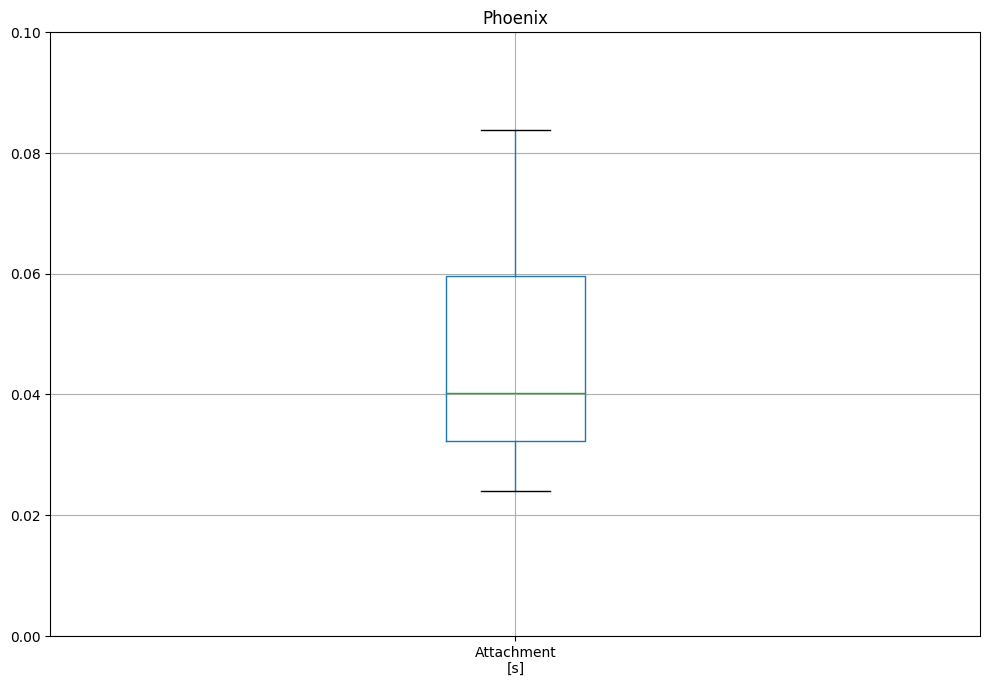

In [2]:
import pandas
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8), dpi=100)
box = pandas.read_csv('attachment.csv', usecols=['Time','Source','Destination','Info'])
# print(box.head())
#radio layer
s1ap_req = box[box['Info'].str.contains("Attach request")]
#EPC
auth_req = box[box['Info'].str.contains("3GPP-Authentication-Information Request")]
auth_ans = box[box['Info'].str.contains("3GPP-Authentication-Information Answer")]
s1ap_auth_req = box[box['Info'].str.contains("Authentication request")]
s1ap_auth_ans = box[box['Info'].str.contains("Authentication response")]
s1ap_sec_req = box[box['Info'].str.contains("Security mode command")]
s1ap_sec_ans = box[box['Info'].str.contains("Security mode complete")]
loc_req = box[box['Info'].str.contains("3GPP-Update-Location Request")]
loc_ans = box[box['Info'].str.contains("3GPP-Update-Location Answer")]
esm_req = box[box['Info'].str.contains("ESM information request")]
esm_ans = box[box['Info'].str.contains("ESM information response")]
ctx_req = box[box['Info'].str.contains("InitialContextSetupRequest")]
ctx_ans = box[box['Info'].str.contains("InitialContextSetupResponse")]
#radio layer
s1ap_ans = box[box['Info'].str.contains("Attach complete")]
s1ap_req.drop(s1ap_req.tail(21).index,inplace=True) #fix for rejected ones

rtt_auth = auth_ans['Time'].values -auth_req['Time'].values
rtt_s1ap_auth = s1ap_auth_ans['Time'].values -s1ap_auth_req['Time'].values
rtt_s1ap_sec = s1ap_sec_ans['Time'].values -s1ap_sec_req['Time'].values
rtt_loc = loc_ans['Time'].values -loc_req['Time'].values
rtt_esm = esm_ans['Time'].values -esm_req['Time'].values
rtt_ctx = ctx_ans['Time'].values -ctx_req['Time'].values
rtt_s1ap = s1ap_ans['Time'].values -s1ap_req['Time'].values
# print(rtt_auth)
auth= pandas.DataFrame(rtt_auth,columns=["3GPP\n Auth\n[s]"])
s1ap_auth= pandas.DataFrame(rtt_s1ap_auth,columns=["S1AP\n Auth\n[s]"])
s1ap_sec= pandas.DataFrame(rtt_s1ap_sec,columns=["S1AP\n Security\n[s]"])
loc= pandas.DataFrame(rtt_loc,columns=["Location\nUpdate\n[s]"])
esm = pandas.DataFrame(rtt_esm,columns=["ESM\n[s]"])
ctx = pandas.DataFrame(rtt_ctx,columns=["Context Setup\n[s]"])
s1ap = pandas.DataFrame(rtt_s1ap,columns=["Attachment\n[s]"])

r = pandas.concat([s1ap],axis=1)
# print(r.head())
r.boxplot()
# plt.xticks([1,2,3,4], ['CoAP Create [s]','CoAP Read [s]','CoAP Reg [s]','SCIM Imsi [s]'])
plt.title('Phoenix')
# plt.suptitle("IP CAN Session Establishment")
axes = plt.gca()
axes.set_ylim([0,0.1])
stats = r.describe()
print(stats)
plt.show()
fig.savefig('attachment.png')   # save the figure to file
plt.close(fig)

       Detachment\nRequest\n[s]  UE Context Release\nRequest\n[s]
count                 79.000000                         79.000000
mean                   0.011083                          0.000174
std                    0.006035                          0.000069
min                    0.003287                          0.000067
25%                    0.006164                          0.000119
50%                    0.009365                          0.000154
75%                    0.014259                          0.000253
max                    0.025045                          0.000306


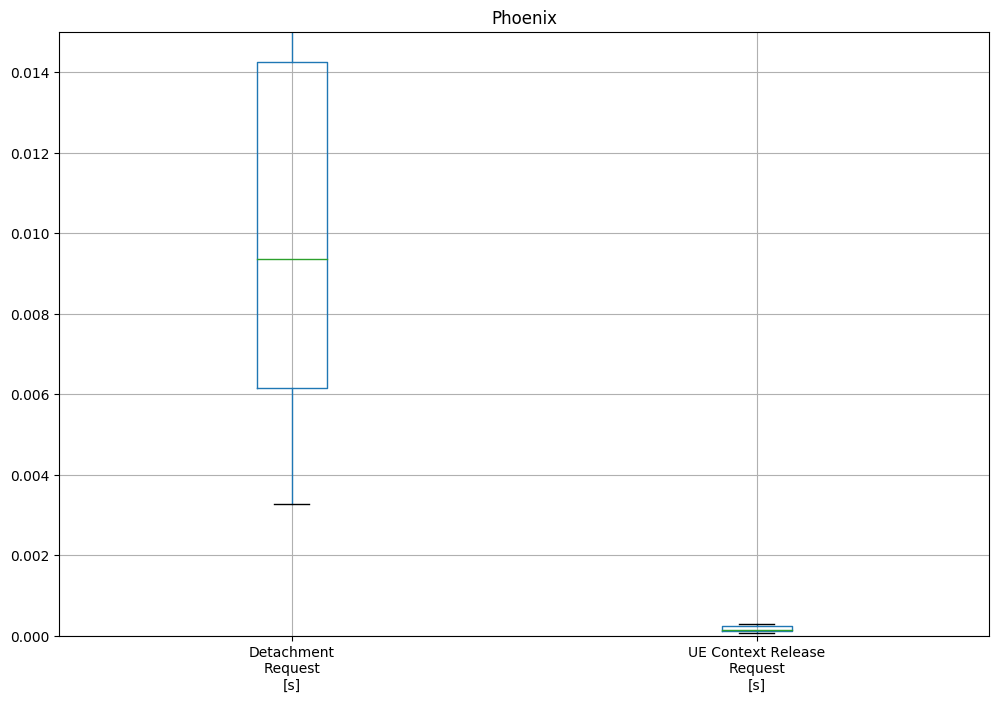

In [3]:
import pandas
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8), dpi=100)
box = pandas.read_csv('detachment.csv', usecols=['Time','Source','Destination','Info'])
# print(box.head())
#radio layer
s1ap_req = box[box['Info'].str.contains("Detach request")]
#EPC
auth_req = box[box['Info'].str.contains("3GPP-Authentication-Information Request")]
auth_ans = box[box['Info'].str.contains("3GPP-Authentication-Information Answer")]
s1ap_auth_req = box[box['Info'].str.contains("Authentication request")]
s1ap_auth_ans = box[box['Info'].str.contains("Authentication response")]
s1ap_sec_req = box[box['Info'].str.contains("Security mode command")]
s1ap_sec_ans = box[box['Info'].str.contains("Security mode complete")]
loc_req = box[box['Info'].str.contains("3GPP-Update-Location Request")]
loc_ans = box[box['Info'].str.contains("3GPP-Update-Location Answer")]
esm_req = box[box['Info'].str.contains("ESM information request")]
esm_ans = box[box['Info'].str.contains("ESM information response")]
ctx_req = box[box['Info'].str.contains("UEContextReleaseCommand")]
ctx_ans = box[box['Info'].str.contains("UEContextReleaseComplete")]
#radio layer
s1ap_ans = box[box['Info'].str.contains("Detach accept")]
# s1ap_req.drop(s1ap_req.tail(21).index,inplace=True) #fix for rejected ones

rtt_auth = auth_ans['Time'].values -auth_req['Time'].values
rtt_s1ap_auth = s1ap_auth_ans['Time'].values -s1ap_auth_req['Time'].values
rtt_s1ap_sec = s1ap_sec_ans['Time'].values -s1ap_sec_req['Time'].values
rtt_loc = loc_ans['Time'].values -loc_req['Time'].values
rtt_esm = esm_ans['Time'].values -esm_req['Time'].values
rtt_ctx = ctx_ans['Time'].values -ctx_req['Time'].values
rtt_s1ap = s1ap_ans['Time'].values -s1ap_req['Time'].values
# print(rtt_auth)
auth= pandas.DataFrame(rtt_auth,columns=["3GPP\n Auth\n[s]"])
s1ap_auth= pandas.DataFrame(rtt_s1ap_auth,columns=["S1AP\n Auth\n[s]"])
s1ap_sec= pandas.DataFrame(rtt_s1ap_sec,columns=["S1AP\n Security\n[s]"])
loc= pandas.DataFrame(rtt_loc,columns=["Location\nUpdate\n[s]"])
esm = pandas.DataFrame(rtt_esm,columns=["ESM\n[s]"])
ctx = pandas.DataFrame(rtt_ctx,columns=["UE Context Release\nRequest\n[s]"])
s1ap = pandas.DataFrame(rtt_s1ap,columns=["Detachment\nRequest\n[s]"])

r = pandas.concat([s1ap,ctx],axis=1)
# print(r.head())
r.boxplot()
# plt.xticks([1,2,3,4], ['CoAP Create [s]','CoAP Read [s]','CoAP Reg [s]','SCIM Imsi [s]'])
plt.title('Phoenix')
# plt.suptitle("IP CAN Session Termination")
axes = plt.gca()
axes.set_ylim([0,0.0150])
stats = r.describe()
print(stats)
plt.show()
fig.savefig('detachment_details.png')   # save the figure to file
plt.close(fig)

       Detachment\n[s]
count        79.000000
mean          0.017965
std           0.006153
min           0.007774
25%           0.011836
50%           0.015781
75%           0.019776
max           0.032057


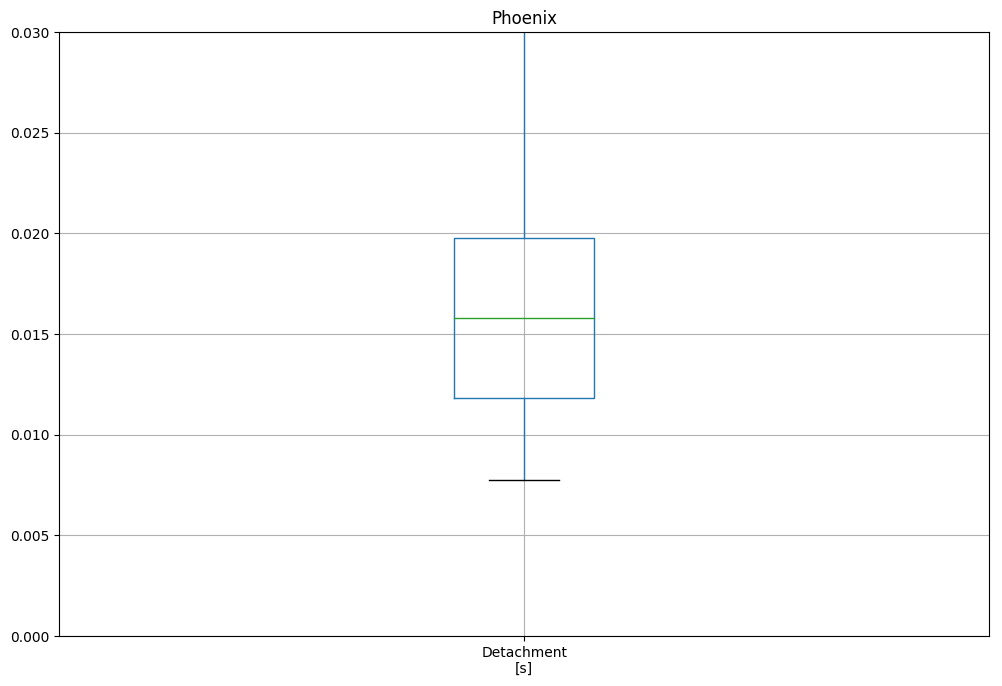

In [4]:
import pandas
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8), dpi=100)
box = pandas.read_csv('detachment.csv', usecols=['Time','Source','Destination','Info'])
# print(box.head())
#radio layer
s1ap_req = box[box['Info'].str.contains("Detach request")]
#EPC
auth_req = box[box['Info'].str.contains("3GPP-Authentication-Information Request")]
auth_ans = box[box['Info'].str.contains("3GPP-Authentication-Information Answer")]
s1ap_auth_req = box[box['Info'].str.contains("Authentication request")]
s1ap_auth_ans = box[box['Info'].str.contains("Authentication response")]
s1ap_sec_req = box[box['Info'].str.contains("Security mode command")]
s1ap_sec_ans = box[box['Info'].str.contains("Security mode complete")]
loc_req = box[box['Info'].str.contains("3GPP-Update-Location Request")]
loc_ans = box[box['Info'].str.contains("3GPP-Update-Location Answer")]
esm_req = box[box['Info'].str.contains("ESM information request")]
esm_ans = box[box['Info'].str.contains("ESM information response")]
ctx_req = box[box['Info'].str.contains("UEContextReleaseCommand")]
ctx_ans = box[box['Info'].str.contains("UEContextReleaseComplete")]
#radio layer
s1ap_ans = box[box['Info'].str.contains("Detach accept")]
# s1ap_req.drop(s1ap_req.tail(21).index,inplace=True) #fix for rejected ones

rtt_auth = auth_ans['Time'].values -auth_req['Time'].values
rtt_s1ap_auth = s1ap_auth_ans['Time'].values -s1ap_auth_req['Time'].values
rtt_s1ap_sec = s1ap_sec_ans['Time'].values -s1ap_sec_req['Time'].values
rtt_loc = loc_ans['Time'].values -loc_req['Time'].values
rtt_esm = esm_ans['Time'].values -esm_req['Time'].values
rtt_ctx = ctx_ans['Time'].values -ctx_req['Time'].values
rtt_s1ap = ctx_ans['Time'].values -s1ap_req['Time'].values
# print(rtt_auth)
auth= pandas.DataFrame(rtt_auth,columns=["3GPP\n Auth\n[s]"])
s1ap_auth= pandas.DataFrame(rtt_s1ap_auth,columns=["S1AP\n Auth\n[s]"])
s1ap_sec= pandas.DataFrame(rtt_s1ap_sec,columns=["S1AP\n Security\n[s]"])
loc= pandas.DataFrame(rtt_loc,columns=["Location\nUpdate\n[s]"])
esm = pandas.DataFrame(rtt_esm,columns=["ESM\n[s]"])
ctx = pandas.DataFrame(rtt_ctx,columns=["UE Context Release\nRequest\n[s]"])
s1ap = pandas.DataFrame(rtt_s1ap,columns=["Detachment\n[s]"])

r = pandas.concat([s1ap],axis=1)
# print(r.head())
r.boxplot()
# plt.xticks([1,2,3,4], ['CoAP Create [s]','CoAP Read [s]','CoAP Reg [s]','SCIM Imsi [s]'])
plt.title('Phoenix')
# plt.suptitle("IP CAN Session Termination")
axes = plt.gca()
axes.set_ylim([0,0.030])
stats = r.describe()
print(stats)
plt.show()
fig.savefig('detachment.png')   # save the figure to file
plt.close(fig)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


       3GPP\n Auth\n[s]  S1AP\n Auth\n[s]  S1AP\n Security\n[s]  \
count        100.000000        100.000000            100.000000   
mean           0.002135          0.000267              0.001000   
std            0.001308          0.000167              0.000624   
min            0.000876          0.000127              0.000476   
25%            0.001093          0.000141              0.000569   
50%            0.001348          0.000175              0.000653   
75%            0.003563          0.000455              0.001398   
max            0.006103          0.000672              0.002404   

       Location\nUpdate\n[s]  Policy and Charging \nControl\n[s]  \
count             100.000000                           79.000000   
mean                0.003053                            0.074090   
std                 0.001772                            0.051077   
min                 0.001550                            0.012981   
25%                 0.001941                            

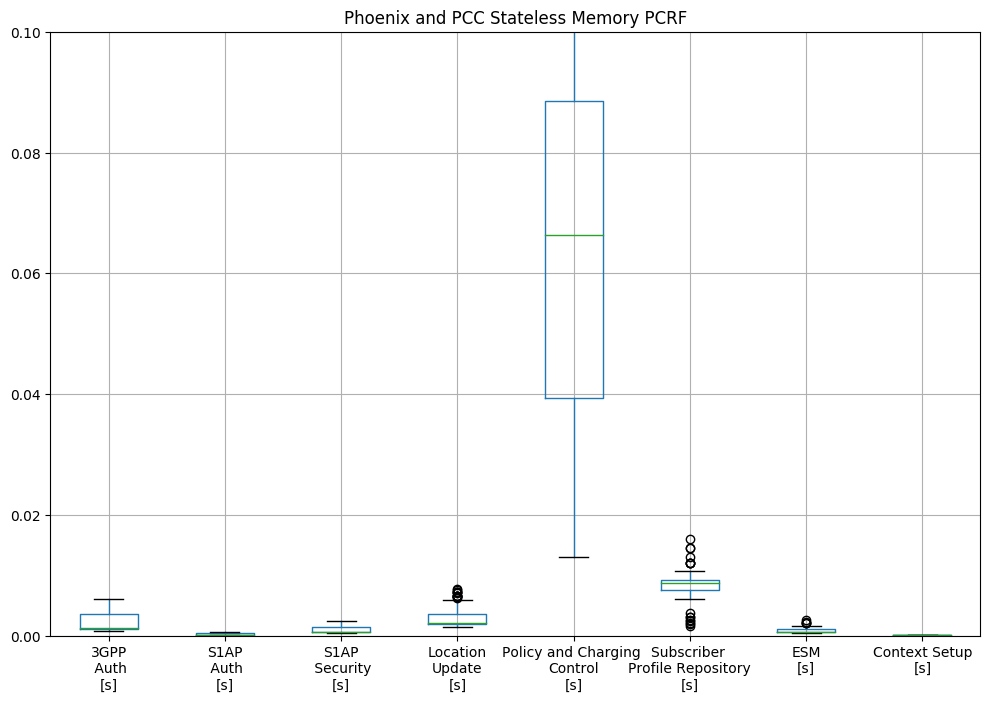

In [5]:
import pandas
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8), dpi=100)
box = pandas.read_csv('attachment_pcc.csv', usecols=['Time','Source','Destination','Info'])
# print(box.head())
#radio layer
s1ap_req = box[box['Info'].str.contains("Attach request")]
#EPC
auth_req = box[box['Info'].str.contains("3GPP-Authentication-Information Request")]
auth_ans = box[box['Info'].str.contains("3GPP-Authentication-Information Answer")]
s1ap_auth_req = box[box['Info'].str.contains("Authentication request")]
s1ap_auth_ans = box[box['Info'].str.contains("Authentication response")]
s1ap_sec_req = box[box['Info'].str.contains("Security mode command")]
s1ap_sec_ans = box[box['Info'].str.contains("Security mode complete")]
loc_req = box[box['Info'].str.contains("3GPP-Update-Location Request")]
loc_ans = box[box['Info'].str.contains("3GPP-Update-Location Answer")]
cc_req = box[box['Info'].str.contains("Credit-Control Request")]
cc_ans = box[box['Info'].str.contains("Credit-Control Answer")]
sp_req = box[box['Info'].str.contains("User-Data Request")]
sp_ans = box[box['Info'].str.contains("User-Data Answer")]
esm_req = box[box['Info'].str.contains("ESM information request")]
esm_ans = box[box['Info'].str.contains("ESM information response")]
ctx_req = box[box['Info'].str.contains("InitialContextSetupRequest")]
ctx_ans = box[box['Info'].str.contains("InitialContextSetupResponse")]
#radio layer
s1ap_ans = box[box['Info'].str.contains("Attach complete")]
s1ap_req.drop(s1ap_req.tail(21).index,inplace=True) #fix for rejected ones

rtt_auth = auth_ans['Time'].values -auth_req['Time'].values
rtt_s1ap_auth = s1ap_auth_ans['Time'].values -s1ap_auth_req['Time'].values
rtt_s1ap_sec = s1ap_sec_ans['Time'].values -s1ap_sec_req['Time'].values
rtt_loc = loc_ans['Time'].values -loc_req['Time'].values
rtt_cc = cc_ans['Time'].values -cc_req['Time'].values
rtt_sp = sp_ans['Time'].values -sp_req['Time'].values
rtt_esm = esm_ans['Time'].values -esm_req['Time'].values
rtt_ctx = ctx_ans['Time'].values -ctx_req['Time'].values
rtt_s1ap = s1ap_ans['Time'].values -s1ap_req['Time'].values
# print(rtt_auth)
auth= pandas.DataFrame(rtt_auth,columns=["3GPP\n Auth\n[s]"])
s1ap_auth= pandas.DataFrame(rtt_s1ap_auth,columns=["S1AP\n Auth\n[s]"])
s1ap_sec= pandas.DataFrame(rtt_s1ap_sec,columns=["S1AP\n Security\n[s]"])
loc= pandas.DataFrame(rtt_loc,columns=["Location\nUpdate\n[s]"])
cc= pandas.DataFrame(rtt_cc,columns=["Policy and Charging \nControl\n[s]"])
sp= pandas.DataFrame(rtt_sp,columns=["Subscriber \nProfile Repository\n[s]"])
esm = pandas.DataFrame(rtt_esm,columns=["ESM\n[s]"])
ctx = pandas.DataFrame(rtt_ctx,columns=["Context Setup\n[s]"])
s1ap = pandas.DataFrame(rtt_s1ap,columns=["Attachment\n[s]"])

r = pandas.concat([auth,s1ap_auth,s1ap_sec,loc,cc,sp,esm,ctx],axis=1)
# print(r.head())
r.boxplot()
# plt.xticks([1,2,3,4], ['CoAP Create [s]','CoAP Read [s]','CoAP Reg [s]','SCIM Imsi [s]'])
plt.title('Phoenix and PCC Stateless Memory PCRF')
# plt.suptitle("IP CAN Session Establishment")
axes = plt.gca()
axes.set_ylim([0,0.1])
stats = r.describe()
print(stats)
plt.show()
fig.savefig('attachment_detail_pcc.png')   # save the figure to file
plt.close(fig)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


       3GPP\n Auth\n[s]  S1AP\n Auth\n[s]  S1AP\n Security\n[s]  \
count        100.000000        100.000000            100.000000   
mean           0.002500          0.000292              0.001019   
std            0.003119          0.000154              0.000553   
min            0.000904          0.000127              0.000479   
25%            0.001279          0.000148              0.000572   
50%            0.001614          0.000210              0.000784   
75%            0.003342          0.000459              0.001334   
max            0.031193          0.000618              0.002344   

       Location\nUpdate\n[s]  Policy and Charging \nControl\n[s]    ESM\n[s]  \
count             100.000000                           82.000000  100.000000   
mean                0.002963                            0.002487    0.000883   
std                 0.001439                            0.000112    0.000375   
min                 0.001434                            0.002347    0.000535

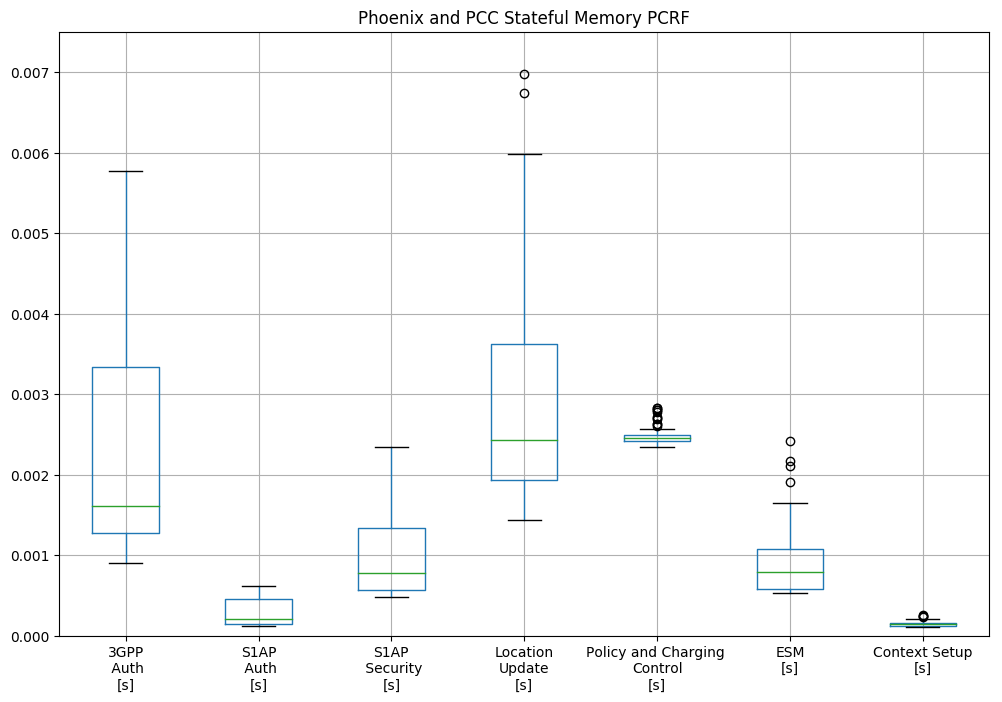

In [6]:
import pandas
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8), dpi=100)
box = pandas.read_csv('attachment_pcc_stateful.csv', usecols=['Time','Source','Destination','Info'])
# print(box.head())
#radio layer
s1ap_req = box[box['Info'].str.contains("Attach request")]
#EPC
auth_req = box[box['Info'].str.contains("3GPP-Authentication-Information Request")]
auth_ans = box[box['Info'].str.contains("3GPP-Authentication-Information Answer")]
s1ap_auth_req = box[box['Info'].str.contains("Authentication request")]
s1ap_auth_ans = box[box['Info'].str.contains("Authentication response")]
s1ap_sec_req = box[box['Info'].str.contains("Security mode command")]
s1ap_sec_ans = box[box['Info'].str.contains("Security mode complete")]
loc_req = box[box['Info'].str.contains("3GPP-Update-Location Request")]
loc_ans = box[box['Info'].str.contains("3GPP-Update-Location Answer")]
cc_req = box[box['Info'].str.contains("Credit-Control Request")]
cc_ans = box[box['Info'].str.contains("Credit-Control Answer")]
sp_req = box[box['Info'].str.contains("User-Data Request")]
sp_ans = box[box['Info'].str.contains("User-Data Answer")]
esm_req = box[box['Info'].str.contains("ESM information request")]
esm_ans = box[box['Info'].str.contains("ESM information response")]
ctx_req = box[box['Info'].str.contains("InitialContextSetupRequest")]
ctx_ans = box[box['Info'].str.contains("InitialContextSetupResponse")]
#radio layer
s1ap_ans = box[box['Info'].str.contains("Attach complete")]
s1ap_req.drop(s1ap_req.tail(18).index,inplace=True) #fix for rejected ones

rtt_auth = auth_ans['Time'].values -auth_req['Time'].values
rtt_s1ap_auth = s1ap_auth_ans['Time'].values -s1ap_auth_req['Time'].values
rtt_s1ap_sec = s1ap_sec_ans['Time'].values -s1ap_sec_req['Time'].values
rtt_loc = loc_ans['Time'].values -loc_req['Time'].values
rtt_cc = cc_ans['Time'].values -cc_req['Time'].values
rtt_sp = sp_ans['Time'].values -sp_req['Time'].values
rtt_esm = esm_ans['Time'].values -esm_req['Time'].values
rtt_ctx = ctx_ans['Time'].values -ctx_req['Time'].values
rtt_s1ap = s1ap_ans['Time'].values -s1ap_req['Time'].values
# print(rtt_auth)
auth= pandas.DataFrame(rtt_auth,columns=["3GPP\n Auth\n[s]"])
s1ap_auth= pandas.DataFrame(rtt_s1ap_auth,columns=["S1AP\n Auth\n[s]"])
s1ap_sec= pandas.DataFrame(rtt_s1ap_sec,columns=["S1AP\n Security\n[s]"])
loc= pandas.DataFrame(rtt_loc,columns=["Location\nUpdate\n[s]"])
cc= pandas.DataFrame(rtt_cc,columns=["Policy and Charging \nControl\n[s]"])
sp= pandas.DataFrame(rtt_sp,columns=["Subscriber \nProfile Repository\n[s]"])
esm = pandas.DataFrame(rtt_esm,columns=["ESM\n[s]"])
ctx = pandas.DataFrame(rtt_ctx,columns=["Context Setup\n[s]"])
s1ap = pandas.DataFrame(rtt_s1ap,columns=["Attachment\n[s]"])

r = pandas.concat([auth,s1ap_auth,s1ap_sec,loc,cc,esm,ctx],axis=1)
# print(r.head())
r.boxplot()
# plt.xticks([1,2,3,4], ['CoAP Create [s]','CoAP Read [s]','CoAP Reg [s]','SCIM Imsi [s]'])
plt.title('Phoenix and PCC Stateful Memory PCRF')
# plt.suptitle("IP CAN Session Establishment")
axes = plt.gca()
axes.set_ylim([0,0.0075])
stats = r.describe()
print(stats)
plt.show()
fig.savefig('attachment_detail_pcc_stateful.png')   # save the figure to file
plt.close(fig)

       Attachment\n[s]
count        79.000000
mean          0.053873
std           0.026489
min           0.029609
25%           0.039633
50%           0.041832
75%           0.065460
max           0.225547


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


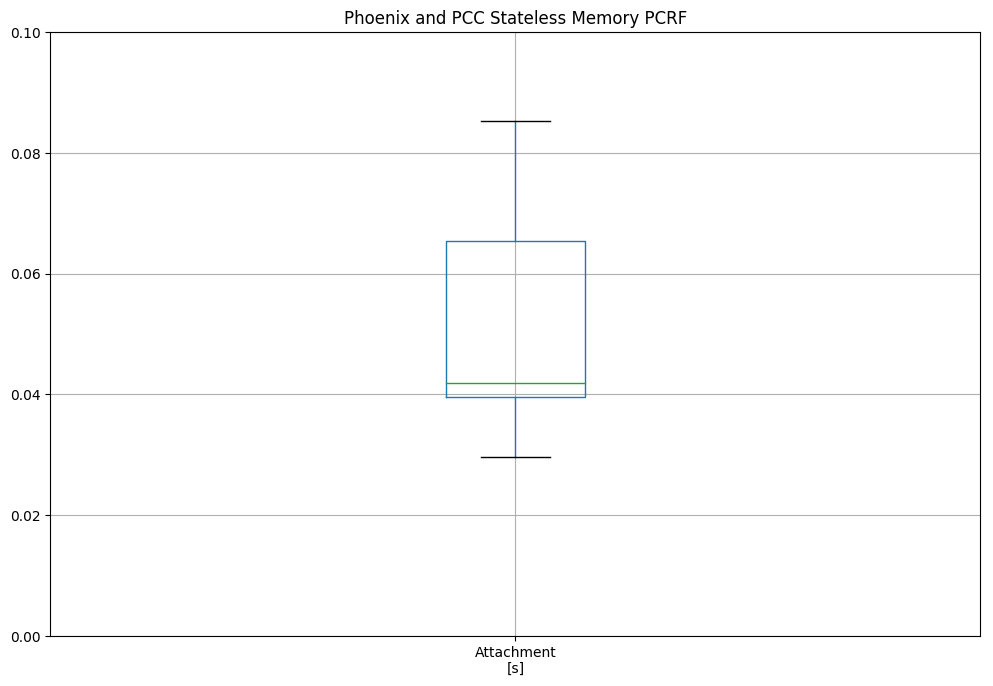

In [7]:
import pandas
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8), dpi=100)
box = pandas.read_csv('attachment_pcc.csv', usecols=['Time','Source','Destination','Info'])
# print(box.head())
#radio layer
s1ap_req = box[box['Info'].str.contains("Attach request")]
#EPC
auth_req = box[box['Info'].str.contains("3GPP-Authentication-Information Request")]
auth_ans = box[box['Info'].str.contains("3GPP-Authentication-Information Answer")]
s1ap_auth_req = box[box['Info'].str.contains("Authentication request")]
s1ap_auth_ans = box[box['Info'].str.contains("Authentication response")]
s1ap_sec_req = box[box['Info'].str.contains("Security mode command")]
s1ap_sec_ans = box[box['Info'].str.contains("Security mode complete")]
loc_req = box[box['Info'].str.contains("3GPP-Update-Location Request")]
loc_ans = box[box['Info'].str.contains("3GPP-Update-Location Answer")]
cc_req = box[box['Info'].str.contains("Credit-Control Request")]
cc_ans = box[box['Info'].str.contains("Credit-Control Answer")]
sp_req = box[box['Info'].str.contains("User-Data Request")]
sp_ans = box[box['Info'].str.contains("User-Data Answer")]
esm_req = box[box['Info'].str.contains("ESM information request")]
esm_ans = box[box['Info'].str.contains("ESM information response")]
ctx_req = box[box['Info'].str.contains("InitialContextSetupRequest")]
ctx_ans = box[box['Info'].str.contains("InitialContextSetupResponse")]
#radio layer
s1ap_ans = box[box['Info'].str.contains("Attach complete")]
s1ap_req.drop(s1ap_req.tail(21).index,inplace=True) #fix for rejected ones

rtt_auth = auth_ans['Time'].values -auth_req['Time'].values
rtt_s1ap_auth = s1ap_auth_ans['Time'].values -s1ap_auth_req['Time'].values
rtt_s1ap_sec = s1ap_sec_ans['Time'].values -s1ap_sec_req['Time'].values
rtt_loc = loc_ans['Time'].values -loc_req['Time'].values
rtt_cc = cc_ans['Time'].values -cc_req['Time'].values
rtt_sp = sp_ans['Time'].values -sp_req['Time'].values
rtt_esm = esm_ans['Time'].values -esm_req['Time'].values
rtt_ctx = ctx_ans['Time'].values -ctx_req['Time'].values
rtt_s1ap = s1ap_ans['Time'].values -s1ap_req['Time'].values
# print(rtt_auth)
auth= pandas.DataFrame(rtt_auth,columns=["3GPP\n Auth\n[s]"])
s1ap_auth= pandas.DataFrame(rtt_s1ap_auth,columns=["S1AP\n Auth\n[s]"])
s1ap_sec= pandas.DataFrame(rtt_s1ap_sec,columns=["S1AP\n Security\n[s]"])
loc= pandas.DataFrame(rtt_loc,columns=["Location\nUpdate\n[s]"])
cc= pandas.DataFrame(rtt_cc,columns=["Policy and Charging \nControl\n[s]"])
sp= pandas.DataFrame(rtt_sp,columns=["Subscriber \nProfile Repository\n[s]"])
esm = pandas.DataFrame(rtt_esm,columns=["ESM\n[s]"])
ctx = pandas.DataFrame(rtt_ctx,columns=["Context Setup\n[s]"])
s1ap = pandas.DataFrame(rtt_s1ap,columns=["Attachment\n[s]"])

r = pandas.concat([s1ap],axis=1)
# print(r.head())
r.boxplot()
# plt.xticks([1,2,3,4], ['CoAP Create [s]','CoAP Read [s]','CoAP Reg [s]','SCIM Imsi [s]'])
plt.title('Phoenix and PCC Stateless Memory PCRF')
# plt.suptitle("IP CAN Session Establishment")
axes = plt.gca()
axes.set_ylim([0,0.1])
stats = r.describe()
print(stats)
plt.show()
fig.savefig('attachment_pcc.png')   # save the figure to file
plt.close(fig)

       Attachment\n[s]
count        82.000000
mean          0.050483
std           0.014799
min           0.026540
25%           0.038724
50%           0.046666
75%           0.062540
max           0.086411


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


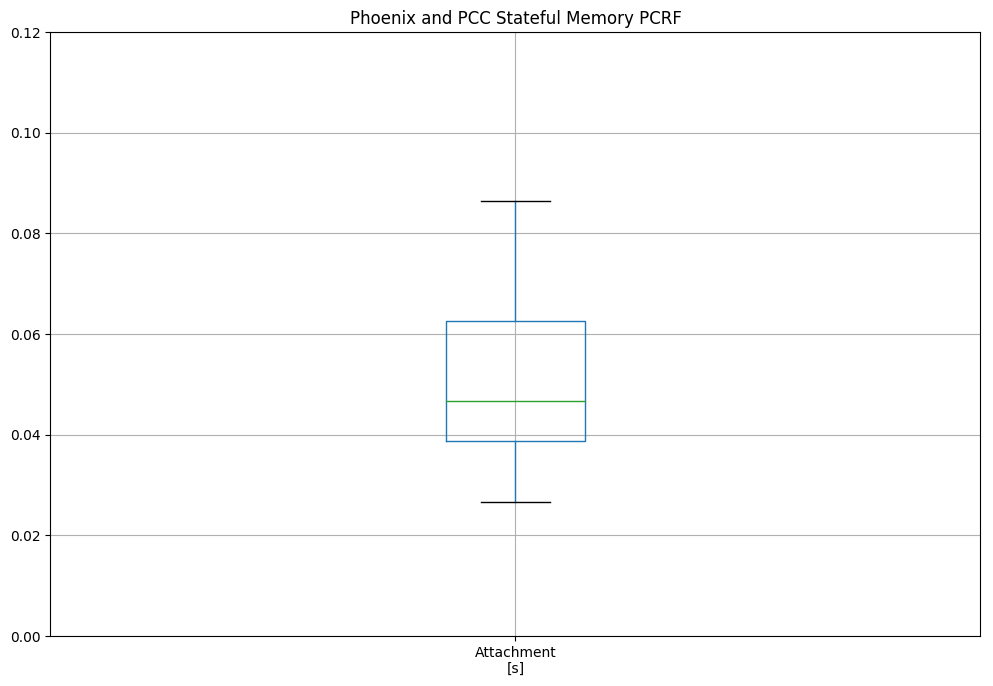

In [8]:
import pandas
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8), dpi=100)
box = pandas.read_csv('attachment_pcc_stateful.csv', usecols=['Time','Source','Destination','Info'])
# print(box.head())
#radio layer
s1ap_req = box[box['Info'].str.contains("Attach request")]
#EPC
auth_req = box[box['Info'].str.contains("3GPP-Authentication-Information Request")]
auth_ans = box[box['Info'].str.contains("3GPP-Authentication-Information Answer")]
s1ap_auth_req = box[box['Info'].str.contains("Authentication request")]
s1ap_auth_ans = box[box['Info'].str.contains("Authentication response")]
s1ap_sec_req = box[box['Info'].str.contains("Security mode command")]
s1ap_sec_ans = box[box['Info'].str.contains("Security mode complete")]
loc_req = box[box['Info'].str.contains("3GPP-Update-Location Request")]
loc_ans = box[box['Info'].str.contains("3GPP-Update-Location Answer")]
cc_req = box[box['Info'].str.contains("Credit-Control Request")]
cc_ans = box[box['Info'].str.contains("Credit-Control Answer")]
sp_req = box[box['Info'].str.contains("User-Data Request")]
sp_ans = box[box['Info'].str.contains("User-Data Answer")]
esm_req = box[box['Info'].str.contains("ESM information request")]
esm_ans = box[box['Info'].str.contains("ESM information response")]
ctx_req = box[box['Info'].str.contains("InitialContextSetupRequest")]
ctx_ans = box[box['Info'].str.contains("InitialContextSetupResponse")]
#radio layer
s1ap_ans = box[box['Info'].str.contains("Attach complete")]
s1ap_req.drop(s1ap_req.tail(18).index,inplace=True) #fix for rejected ones

rtt_auth = auth_ans['Time'].values -auth_req['Time'].values
rtt_s1ap_auth = s1ap_auth_ans['Time'].values -s1ap_auth_req['Time'].values
rtt_s1ap_sec = s1ap_sec_ans['Time'].values -s1ap_sec_req['Time'].values
rtt_loc = loc_ans['Time'].values -loc_req['Time'].values
rtt_cc = cc_ans['Time'].values -cc_req['Time'].values
rtt_sp = sp_ans['Time'].values -sp_req['Time'].values
rtt_esm = esm_ans['Time'].values -esm_req['Time'].values
rtt_ctx = ctx_ans['Time'].values -ctx_req['Time'].values
rtt_s1ap = s1ap_ans['Time'].values -s1ap_req['Time'].values
# print(rtt_auth)
auth= pandas.DataFrame(rtt_auth,columns=["3GPP\n Auth\n[s]"])
s1ap_auth= pandas.DataFrame(rtt_s1ap_auth,columns=["S1AP\n Auth\n[s]"])
s1ap_sec= pandas.DataFrame(rtt_s1ap_sec,columns=["S1AP\n Security\n[s]"])
loc= pandas.DataFrame(rtt_loc,columns=["Location\nUpdate\n[s]"])
cc= pandas.DataFrame(rtt_cc,columns=["Policy and Charging \nControl\n[s]"])
sp= pandas.DataFrame(rtt_sp,columns=["Subscriber \nProfile Repository\n[s]"])
esm = pandas.DataFrame(rtt_esm,columns=["ESM\n[s]"])
ctx = pandas.DataFrame(rtt_ctx,columns=["Context Setup\n[s]"])
s1ap = pandas.DataFrame(rtt_s1ap,columns=["Attachment\n[s]"])

r = pandas.concat([s1ap],axis=1)
# print(r.head())
r.boxplot()
# plt.xticks([1,2,3,4], ['CoAP Create [s]','CoAP Read [s]','CoAP Reg [s]','SCIM Imsi [s]'])
plt.title('Phoenix and PCC Stateful Memory PCRF')
# plt.suptitle("IP CAN Session Establishment")
axes = plt.gca()
axes.set_ylim([0,0.12])
stats = r.describe()
print(stats)
plt.show()
fig.savefig('attachment_pcc_stateful.png')   # save the figure to file
plt.close(fig)

       Detachment\nRequest\n[s]  UE Context Release\nRequest\n[s]  \
count                 79.000000                         79.000000   
mean                   0.012485                          0.000152   
std                    0.025302                          0.000069   
min                    0.003481                          0.000066   
25%                    0.006027                          0.000097   
50%                    0.006498                          0.000124   
75%                    0.014147                          0.000193   
max                    0.228099                          0.000307   

       Policy and Charging \nControl\n[s]  
count                           75.000000  
mean                             0.047230  
std                              0.025663  
min                              0.000108  
25%                              0.038881  
50%                              0.054423  
75%                              0.062510  
max                       

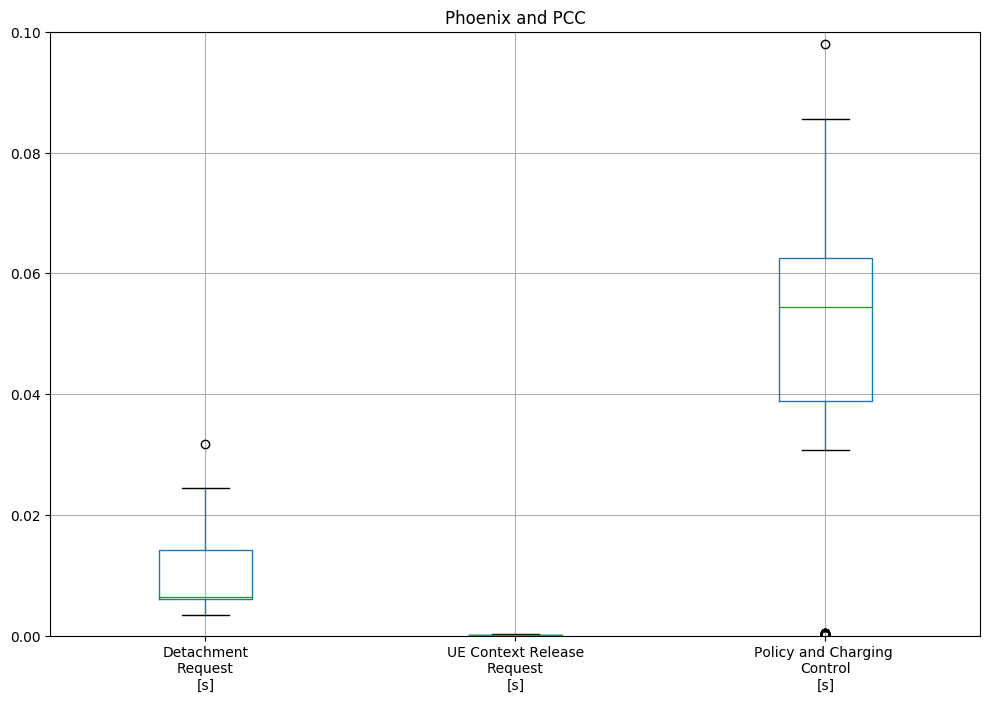

In [9]:
import pandas
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8), dpi=100)
box = pandas.read_csv('detachment_pcc.csv', usecols=['Time','Source','Destination','Info'])
# print(box.head())
#radio layer
s1ap_req = box[box['Info'].str.contains("Detach request")]
#EPC
cc_req = box[box['Info'].str.contains("Credit-Control Request")]
cc_ans = box[box['Info'].str.contains("Credit-Control Answer")]

auth_req = box[box['Info'].str.contains("3GPP-Authentication-Information Request")]
auth_ans = box[box['Info'].str.contains("3GPP-Authentication-Information Answer")]
s1ap_auth_req = box[box['Info'].str.contains("Authentication request")]
s1ap_auth_ans = box[box['Info'].str.contains("Authentication response")]
s1ap_sec_req = box[box['Info'].str.contains("Security mode command")]
s1ap_sec_ans = box[box['Info'].str.contains("Security mode complete")]
loc_req = box[box['Info'].str.contains("3GPP-Update-Location Request")]
loc_ans = box[box['Info'].str.contains("3GPP-Update-Location Answer")]
esm_req = box[box['Info'].str.contains("ESM information request")]
esm_ans = box[box['Info'].str.contains("ESM information response")]
ctx_req = box[box['Info'].str.contains("UEContextReleaseCommand")]
ctx_ans = box[box['Info'].str.contains("UEContextReleaseComplete")]
#radio layer
s1ap_ans = box[box['Info'].str.contains("Detach accept")]
# s1ap_req.drop(s1ap_req.tail(21).index,inplace=True) #fix for rejected ones

rtt_auth = auth_ans['Time'].values -auth_req['Time'].values
rtt_s1ap_auth = s1ap_auth_ans['Time'].values -s1ap_auth_req['Time'].values
rtt_s1ap_sec = s1ap_sec_ans['Time'].values -s1ap_sec_req['Time'].values
rtt_loc = loc_ans['Time'].values -loc_req['Time'].values
rtt_esm = esm_ans['Time'].values -esm_req['Time'].values
rtt_ctx = ctx_ans['Time'].values -ctx_req['Time'].values
rtt_cc = cc_ans['Time'].values -cc_req['Time'].values
rtt_s1ap = s1ap_ans['Time'].values -s1ap_req['Time'].values
# print(rtt_auth)
auth= pandas.DataFrame(rtt_auth,columns=["3GPP\n Auth\n[s]"])
s1ap_auth= pandas.DataFrame(rtt_s1ap_auth,columns=["S1AP\n Auth\n[s]"])
s1ap_sec= pandas.DataFrame(rtt_s1ap_sec,columns=["S1AP\n Security\n[s]"])
loc= pandas.DataFrame(rtt_loc,columns=["Location\nUpdate\n[s]"])
esm = pandas.DataFrame(rtt_esm,columns=["ESM\n[s]"])
ctx = pandas.DataFrame(rtt_ctx,columns=["UE Context Release\nRequest\n[s]"])
s1ap = pandas.DataFrame(rtt_s1ap,columns=["Detachment\nRequest\n[s]"])
cc= pandas.DataFrame(rtt_cc,columns=["Policy and Charging \nControl\n[s]"])
r = pandas.concat([s1ap,ctx,cc],axis=1)
# print(r.head())
r.boxplot()
# plt.xticks([1,2,3,4], ['CoAP Create [s]','CoAP Read [s]','CoAP Reg [s]','SCIM Imsi [s]'])
plt.title('Phoenix and PCC')
# plt.suptitle("IP CAN Session Termination")
axes = plt.gca()
axes.set_ylim([0,0.1])
stats = r.describe()
print(stats)
plt.show()
fig.savefig('detachment_detail_pcc.png')   # save the figure to file
plt.close(fig)

       Detachment\n[s]
count        79.000000
mean          0.019236
std           0.025129
min           0.009475
25%           0.013509
50%           0.013625
75%           0.021384
max           0.233359


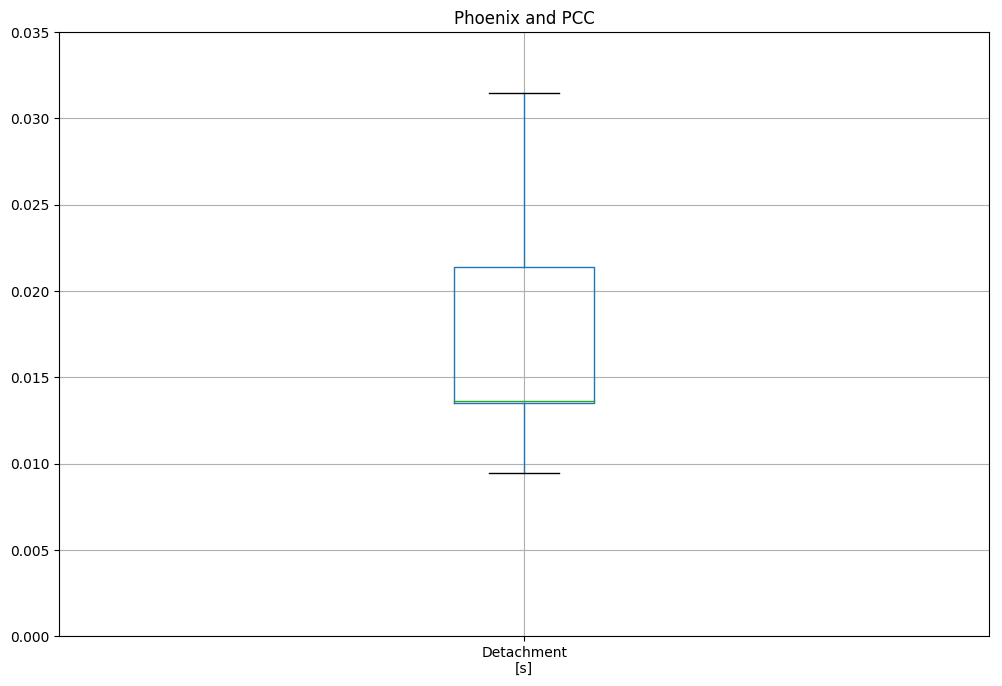

In [13]:
import pandas
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8), dpi=100)
box = pandas.read_csv('detachment_pcc.csv', usecols=['Time','Source','Destination','Info'])
# print(box.head())
#radio layer
s1ap_req = box[box['Info'].str.contains("Detach request")]
#EPC
cc_req = box[box['Info'].str.contains("Credit-Control Request")]
cc_ans = box[box['Info'].str.contains("Credit-Control Answer")]

auth_req = box[box['Info'].str.contains("3GPP-Authentication-Information Request")]
auth_ans = box[box['Info'].str.contains("3GPP-Authentication-Information Answer")]
s1ap_auth_req = box[box['Info'].str.contains("Authentication request")]
s1ap_auth_ans = box[box['Info'].str.contains("Authentication response")]
s1ap_sec_req = box[box['Info'].str.contains("Security mode command")]
s1ap_sec_ans = box[box['Info'].str.contains("Security mode complete")]
loc_req = box[box['Info'].str.contains("3GPP-Update-Location Request")]
loc_ans = box[box['Info'].str.contains("3GPP-Update-Location Answer")]
esm_req = box[box['Info'].str.contains("ESM information request")]
esm_ans = box[box['Info'].str.contains("ESM information response")]
ctx_req = box[box['Info'].str.contains("UEContextReleaseCommand")]
ctx_ans = box[box['Info'].str.contains("UEContextReleaseComplete")]
#radio layer
s1ap_ans = box[box['Info'].str.contains("Detach accept")]
# s1ap_req.drop(s1ap_req.tail(21).index,inplace=True) #fix for rejected ones

rtt_auth = auth_ans['Time'].values -auth_req['Time'].values
rtt_s1ap_auth = s1ap_auth_ans['Time'].values -s1ap_auth_req['Time'].values
rtt_s1ap_sec = s1ap_sec_ans['Time'].values -s1ap_sec_req['Time'].values
rtt_loc = loc_ans['Time'].values -loc_req['Time'].values
rtt_esm = esm_ans['Time'].values -esm_req['Time'].values
rtt_ctx = ctx_ans['Time'].values -ctx_req['Time'].values
rtt_cc = cc_ans['Time'].values -cc_req['Time'].values
rtt_s1ap = ctx_ans['Time'].values -s1ap_req['Time'].values
# print(rtt_auth)
auth= pandas.DataFrame(rtt_auth,columns=["3GPP\n Auth\n[s]"])
s1ap_auth= pandas.DataFrame(rtt_s1ap_auth,columns=["S1AP\n Auth\n[s]"])
s1ap_sec= pandas.DataFrame(rtt_s1ap_sec,columns=["S1AP\n Security\n[s]"])
loc= pandas.DataFrame(rtt_loc,columns=["Location\nUpdate\n[s]"])
esm = pandas.DataFrame(rtt_esm,columns=["ESM\n[s]"])
ctx = pandas.DataFrame(rtt_ctx,columns=["UE Context Release\nRequest\n[s]"])
s1ap = pandas.DataFrame(rtt_s1ap,columns=["Detachment\n[s]"])
cc= pandas.DataFrame(rtt_cc,columns=["Policy and Charging \nControl\n[s]"])
r = pandas.concat([s1ap],axis=1)
# print(r.head())
r.boxplot()
# plt.xticks([1,2,3,4], ['CoAP Create [s]','CoAP Read [s]','CoAP Reg [s]','SCIM Imsi [s]'])
plt.title('Phoenix and PCC')
# plt.suptitle("IP CAN Session Termination")
axes = plt.gca()
axes.set_ylim([0,0.035])
stats = r.describe()
print(stats)
plt.show()
fig.savefig('detachment_pcc.png')   # save the figure to file
plt.close(fig)